In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install pyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,250 kB/s)
debconf: unable to initia

In [ ]:
###高鐵網站好像有擋selenium
#url = 'https://irs.thsrc.com.tw/IMINT/'

In [4]:
from PIL import Image
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2
import re
import pyocr
import pyocr.builders


path = '/content/drive/MyDrive/Colab Notebooks/big data sample/tickets/'

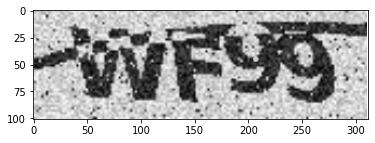

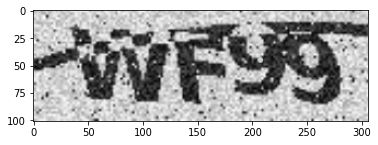

In [ ]:
###用PIL擷取圖片中特定位置的pixel點
img = Image.open(path+'ticket.png')
###crop(左上角x座標，左上角y座標，右下角x座標，右下角y座標)
img2 = img.crop((0,0,306,101))
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()
img2.save(path+'crop_img.png')

(101, 306, 3)


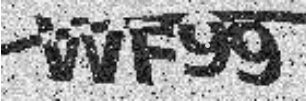

In [5]:
###OpenCV:利用影像辨識去做圖像處理
image = cv2.imread(path+'crop_img.png')

print(image.shape)
cv2_imshow(image)

In [ ]:
###fastNlMeansDenoisingColored:去除圖片中的雜點(image, None, N, N, 7, 21)
###藉由不同的雜點濾波強度(N)去看圖片去噪的效果

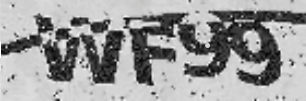

In [ ]:
drop_noise = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
cv2_imshow(drop_noise)

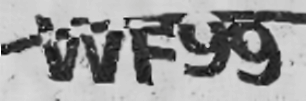

In [ ]:
drop_noise1 = cv2.fastNlMeansDenoisingColored(image, None, 20, 20, 7, 21)
cv2_imshow(drop_noise1)

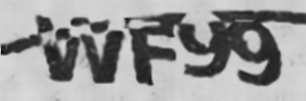

In [6]:
drop_noise2 = cv2.fastNlMeansDenoisingColored(image, None, 30, 30, 7, 21)
cv2_imshow(drop_noise2)

127.0


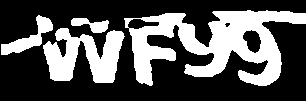

In [7]:
###threshold:設定黑白的臨界點，超過為白，不超過為黑
ret, thres = cv2.threshold(drop_noise2,127,255,cv2.THRESH_BINARY_INV)
print(ret)
cv2_imshow(thres)

101
306


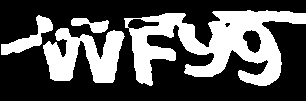

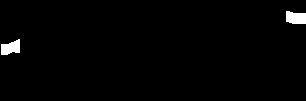

In [8]:
###cvtColor:把黑白照片轉成灰階圖片
image_gray = cv2.cvtColor(thres,cv2.COLOR_BGR2GRAY)

height = image_gray.shape[0]
width = image_gray.shape[1]
print(height) ###高度
print(width) ###寬度
cv2_imshow(image_gray)

###利用offset找到邊界把迴歸線的頭尾找出來
offset = 20
start = offset
end = width-offset

###挖空圖片中間資料的部分
image_gray[:,start:end] = 0
cv2_imshow(image_gray)

In [9]:
###存放所有白點的Y和X座標
imagedata = np.where(image_gray==255)
imagedata

(array([11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
        16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
        17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
        21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
        22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 

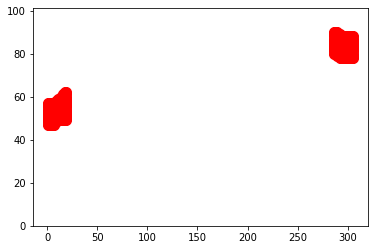

In [ ]:
plt.scatter(imagedata[1], height-imagedata[0], s=100, color='red', label='Cluster')
plt.ylim(0, height)
plt.show()

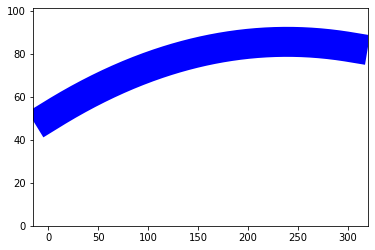

In [10]:
##因為圖片上的弧線為二次曲線，利用相關方法去除
regression = PolynomialFeatures(degree=2)
function = LinearRegression()
X = np.array([imagedata[1]])
Y = height-imagedata[0]

X_ = regression.fit_transform(X.T)
function.fit(X_,Y)
###設定數據的處理方式
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

X2 = np.array([[i for i in range(0,width)]])
X2_ = regression.fit_transform(X2.T)
plt.plot(X2.T, function.predict(X2_), color='blue', linewidth=30)
plt.ylim(0, height)
plt.show()

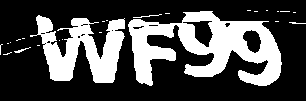

True

In [23]:
gray_image = cv2.cvtColor(thres,cv2.COLOR_BGR2GRAY)

###逐一處理數據串列
###預測的y位置四捨五入到整數位
for element in np.column_stack([function.predict(X2_).round(0),X2[0],]):
   position = height-int(element[0])
   ###將預測到的回歸線座標的上下num個pixel點做反相處理(白->黑 黑->白)
   ###書中num=3是對圖片大小較小時做的，實際情況要自己設不同num去看去除回歸線的表現
   try:
     num = 5
     gray_image[position-num:position+num, int(element[1])] = 255 - gray_image[position-num:position+num, int(element[1])]
   except IndexError:
     pass

cv2_imshow(gray_image)
cv2.imwrite(path+'delete_linearline.png', gray_image)

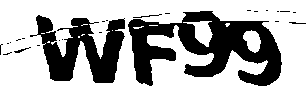

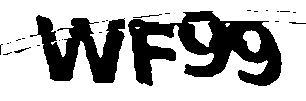

In [24]:
###自行去除小白點

###把圖片反相黑白
_, inv = cv2.threshold(gray_image,150,255,cv2.THRESH_BINARY_INV)
cv2_imshow(inv)

###看小白點在自身周圍5*5宮格的總數若在一個threshold內，就移除掉(轉為黑點)
for i in range(len(inv)):
  for j in range(len(inv[i])):
    if inv[i][j] == 255:
      count = 0
      for k in range(-2,3):
        for l in range(-2,3):
          try:
            if inv[i+k][j+l] == 255:
               count += 1
          except IndexError:
            pass
      if count <=6:
         inv[i][j] =0

cv2_imshow(inv)

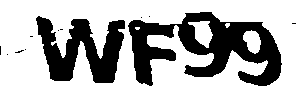

True

In [41]:
###圖形加粗(將字體加粗)，將圖片中的白點膨脹

dilation = cv2.dilate(inv, (8,8), iterations=1)
cv2_imshow(dilation)
cv2.imwrite(path+'final_image.png', dilation)

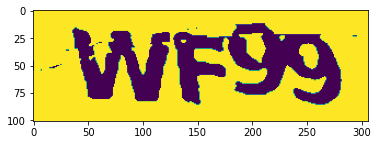

result= -WE99,


In [45]:
img = Image.open(path+'final_image.png')
plt.imshow(img)
plt.show()


tools = pyocr.get_available_tools()
tool = tools[0]

result = tool.image_to_string(
    Image.open(path+'final_image.png'),
    builder = pyocr.builders.TextBuilder()
)

print('result=',result)

In [ ]:
result1 = result.replace(" ","").strip()
result1 = re.findall('[a-zA-Z0-9]*', result1)
result1

['', 'WE99', '', '']

In [ ]:
###整合程式碼，把不同offset的去除回歸線的結果存出來

###offset:不同的起始設定會產生不同弧度的回歸線
###delete_number:不同上下範圍pixel去消除回歸線(可能受圖片size影響)
def codeocr(offset,delete_number):
  ###
  image_gray = cv2.cvtColor(thres,cv2.COLOR_BGR2GRAY)
  height = image_gray.shape[0]
  width = image_gray.shape[1]

  offset = offset
  start = offset
  end = width-offset
  image_gray[:,start:end] = 0
  
  ###
  imagedata = np.where(image_gray==255)
  
  ###
  regression = PolynomialFeatures(degree=2)
  function = LinearRegression()
  X = np.array([imagedata[1]])
  Y = height-imagedata[0]

  X_ = regression.fit_transform(X.T)
  function.fit(X_,Y)
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

  X2 = np.array([[i for i in range(0,width)]])
  X2_ = regression.fit_transform(X2.T)

  ###
  gray_image = cv2.cvtColor(thres,cv2.COLOR_BGR2GRAY)

  for element in np.column_stack([function.predict(X2_).round(0),X2[0],]):
    position = height-int(element[0])
    try:
      num = delete_number
      gray_image[position-num:position+num, int(element[1])] = 255 - gray_image[position-num:position+num, int(element[1])]
    except IndexError:
      pass

  ###
  _, inv = cv2.threshold(gray_image,150,255,cv2.THRESH_BINARY_INV)

  for i in range(len(inv)):
    for j in range(len(inv[i])):
      if inv[i][j] == 255:
        count = 0
        for k in range(-2,3):
          for l in range(-2,3):
            try:
              if inv[i+k][j+l] == 255:
                count += 1
            except IndexError:
              pass
        if count <=6:
          inv[i][j] =0    
  
  ###
  dilation = cv2.dilate(inv, (8,8), iterations=1)
  cv2.imwrite(path+'final_image_withoffset_' + str(offset) +'.png', dilation)
  
  ###
  tools = pyocr.get_available_tools()
  tool = tools[0]

  result = tool.image_to_string(
      Image.open(path+'final_image_withoffset_' + str(offset) +'.png'),
  )
  return result

In [ ]:
offset = 3
output = []
answer = 'WF99'
delete = 5
while offset<20:
  offset += 1
  print("\noffset=",offset,end="  ")
  res = codeocr(offset, delete)
  result1 = res.replace(" ","").strip()
  result1 = re.findall('[a-zA-Z0-9]*', result1)
  for i in result1:
    if len(i) == len(answer):
      output.append(i)
      print('find output:',i)

print('結果:', output)      


offset= 4  
offset= 5  find output: WEIS

offset= 6  
offset= 7  find output: WeIS

offset= 8  
offset= 9  find output: WEDS

offset= 10  
offset= 11  
offset= 12  
offset= 13  
offset= 14  
offset= 15  
offset= 16  
offset= 17  find output: WESS

offset= 18  find output: WE99

offset= 19  find output: WE99

offset= 20  find output: WE99
結果: ['WEIS', 'WeIS', 'WEDS', 'WESS', 'WE99', 'WE99', 'WE99']
